(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 54s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


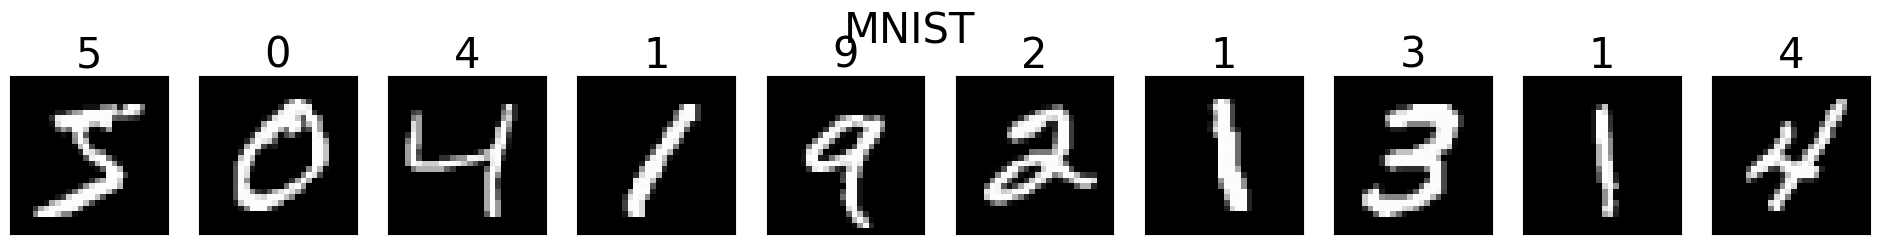

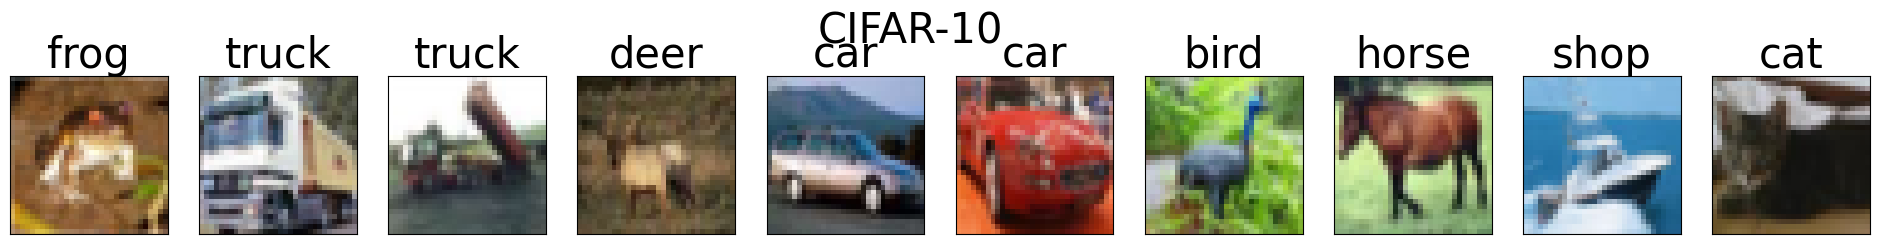

In [8]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

(x_train,y_train), (x_test, y_test)=ds.mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize=30)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([]);plt.yticks([])
    plt.title(str(y_train[i]),fontsize=30)

(x_train,y_train), (x_test, y_test)=ds.cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','shop','truck']
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10', fontsize=30)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]);plt.yticks([])
    plt.title(class_names[y_train[i,0]],fontsize=30)


**다층 퍼셉트론으로 MNIST 인식하기(SGD옵티마이저)**

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))

mlp.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),
metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 5s - 10ms/step - accuracy: 0.2058 - loss: 0.0879 - val_accuracy: 0.2934 - val_loss: 0.0845
Epoch 2/50
469/469 - 3s - 7ms/step - accuracy: 0.3744 - loss: 0.0813 - val_accuracy: 0.4707 - val_loss: 0.0778
Epoch 3/50
469/469 - 3s - 7ms/step - accuracy: 0.5240 - loss: 0.0745 - val_accuracy: 0.5845 - val_loss: 0.0707
Epoch 4/50
469/469 - 2s - 5ms/step - accuracy: 0.6140 - loss: 0.0673 - val_accuracy: 0.6524 - val_loss: 0.0632
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.6704 - loss: 0.0602 - val_accuracy: 0.6975 - val_loss: 0.0564
Epoch 6/50
469/469 - 2s - 5ms/step - accuracy: 0.7106 - loss: 0.0541 - val_accuracy: 0.7421 - val_loss: 0.0507
Epoch 7/50
469/469 - 2s - 5ms/step - accuracy: 0.7478 - loss: 0.0491 - val_accuracy: 0.7763 - val_loss: 0.0460
Epoch 8/50
469/469 - 2s - 5ms/step - accuracy: 0.7751 - loss: 0.0449 - val_accuracy: 0.8004 - val_loss: 0.0422
Epoch 9/50
469/469 - 2s - 5ms/step - accuracy: 0.7952 - loss: 0.0416 - val_accuracy: 0.8138 - val_loss: 0.0391


**다층 퍼셉트론으로 MNIST 인식하기(Adam 옵티마이저)**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))

mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

c:\Users\장동민\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 - 9s - 19ms/step - accuracy: 0.9026 - loss: 0.0148 - val_accuracy: 0.9322 - val_loss: 0.0102
Epoch 2/50
469/469 - 7s - 14ms/step - accuracy: 0.9435 - loss: 0.0088 - val_accuracy: 0.9529 - val_loss: 0.0075
Epoch 3/50
469/469 - 6s - 12ms/step - accuracy: 0.9583 - loss: 0.0065 - val_accuracy: 0.9582 - val_loss: 0.0064
Epoch 4/50
469/469 - 6s - 12ms/step - accuracy: 0.9681 - loss: 0.0051 - val_accuracy: 0.9667 - val_loss: 0.0053
Epoch 5/50
469/469 - 10s - 21ms/step - accuracy: 0.9746 - loss: 0.0042 - val_accuracy: 0.9698 - val_loss: 0.0046
Epoch 6/50
469/469 - 6s - 13ms/step - accuracy: 0.9796 - loss: 0.0034 - val_accuracy: 0.9724 - val_loss: 0.0042
Epoch 7/50
469/469 - 6s - 12ms/step - accuracy: 0.9832 - loss: 0.0028 - val_accuracy: 0.9733 - val_loss: 0.0041
Epoch 8/50
469/469 - 9s - 19ms/step - accuracy: 0.9860 - loss: 0.0024 - val_accuracy: 0.9749 - val_loss: 0.0038
Epoch 9/50
469/469 - 4s - 9ms/step - accuracy: 0.9883 - loss: 0.0020 - val_accuracy: 0.9749 - val_loss:

**성능 그래프 비교**

c:\Users\장동민\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 - 7s - 14ms/step - accuracy: 0.2079 - loss: 0.0885 - val_accuracy: 0.2173 - val_loss: 0.0882
Epoch 2/50
469/469 - 4s - 8ms/step - accuracy: 0.2344 - loss: 0.0877 - val_accuracy: 0.2440 - val_loss: 0.0874
Epoch 3/50
469/469 - 3s - 7ms/step - accuracy: 0.2627 - loss: 0.0870 - val_accuracy: 0.2707 - val_loss: 0.0867
Epoch 4/50
469/469 - 3s - 6ms/step - accuracy: 0.2919 - loss: 0.0862 - val_accuracy: 0.3020 - val_loss: 0.0859
Epoch 5/50
469/469 - 2s - 5ms/step - accuracy: 0.3205 - loss: 0.0855 - val_accuracy: 0.3305 - val_loss: 0.0852
Epoch 6/50
469/469 - 3s - 6ms/step - accuracy: 0.3478 - loss: 0.0847 - val_accuracy: 0.3566 - val_loss: 0.0844
Epoch 7/50
469/469 - 4s - 9ms/step - accuracy: 0.3738 - loss: 0.0839 - val_accuracy: 0.3805 - val_loss: 0.0836
Epoch 8/50
469/469 - 3s - 6ms/step - accuracy: 0.3934 - loss: 0.0831 - val_accuracy: 0.3995 - val_loss: 0.0828
Epoch 9/50
469/469 - 2s - 5ms/step - accuracy: 0.4099 - loss: 0.0823 - val_accuracy: 0.4144 - val_loss: 0.0819


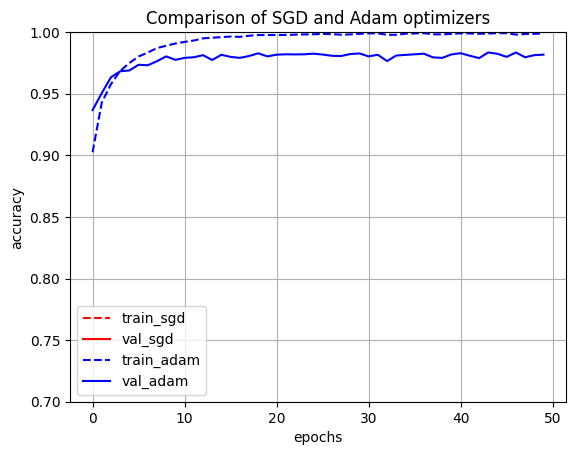

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.001),
metrics=['accuracy'])
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('ADAM 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()


Epoch 1/50
469/469 - 17s - 36ms/step - accuracy: 0.9391 - loss: 0.2021 - val_accuracy: 0.9675 - val_loss: 0.1018
Epoch 2/50
469/469 - 17s - 37ms/step - accuracy: 0.9748 - loss: 0.0795 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 3/50
469/469 - 18s - 38ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9760 - val_loss: 0.0812
Epoch 4/50
469/469 - 16s - 35ms/step - accuracy: 0.9875 - loss: 0.0386 - val_accuracy: 0.9806 - val_loss: 0.0628
Epoch 5/50
469/469 - 18s - 37ms/step - accuracy: 0.9894 - loss: 0.0315 - val_accuracy: 0.9774 - val_loss: 0.0763
Epoch 6/50
469/469 - 18s - 38ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9787 - val_loss: 0.0794
Epoch 7/50
469/469 - 19s - 40ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9769 - val_loss: 0.0866
Epoch 8/50
469/469 - 18s - 38ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9832 - val_loss: 0.0717
Epoch 9/50
469/469 - 17s - 36ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9826 - 

ADAM 정확률= 98.39000105857849


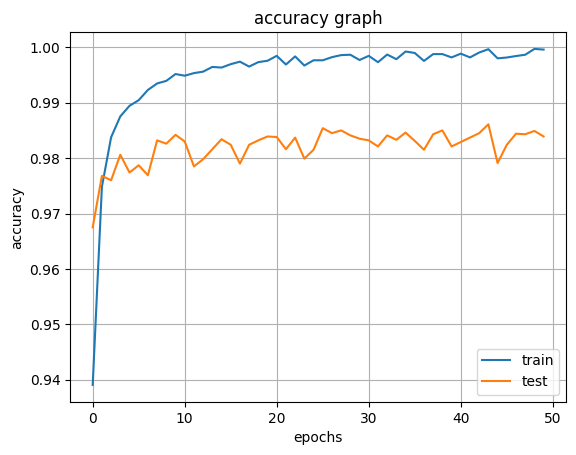

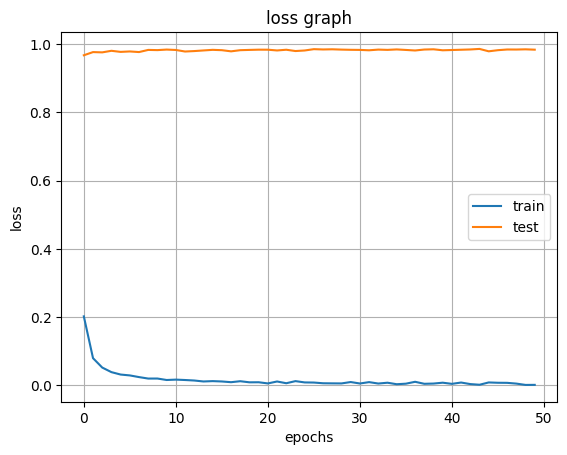

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('ADAM 정확률=',dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()


**우편번호 인식기**

In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img

    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]);plt.yticks([])
    plt.show()

def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals)
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)

BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,parm):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1)
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON:
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()

c:\Users\asia\anaconda3\envs\cv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\asia\anaconda3\envs\cv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


**LeNet-5로 MNIST 인식하기**

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/30
469/469 - 9s - 19ms/step - accuracy: 0.9165 - loss: 0.2882 - val_accuracy: 0.9765 - val_loss: 0.0782
Epoch 2/30
469/469 - 6s - 13ms/step - accuracy: 0.9754 - loss: 0.0790 - val_accuracy: 0.9829 - val_loss: 0.0536
Epoch 3/30
469/469 - 5s - 12ms/step - accuracy: 0.9829 - loss: 0.0544 - val_accuracy: 0.9839 - val_loss: 0.0498
Epoch 4/30
469/469 - 6s - 13ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9875 - val_loss: 0.0392
Epoch 5/30
469/469 - 6s - 12ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9864 - val_loss: 0.0446
Epoch 6/30
469/469 - 6s - 12ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 7/30
469/469 - 6s - 12ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9869 - val_loss: 0.0379
Epoch 8/30
469/469 - 5s - 12ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9891 - val_loss: 0.0343
Epoch 9/30
469/469 - 7s - 14ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.9893 - val_loss:

**필기 숫자 인식기 성능 향상기**

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),
metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

cnn.save('cnn_v2.h5')

res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

c:\Users\장동민\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 - 59s - 125ms/step - accuracy: 0.9458 - loss: 0.1775 - val_accuracy: 0.9880 - val_loss: 0.0364
Epoch 2/100
469/469 - 57s - 121ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9892 - val_loss: 0.0358
Epoch 3/100
469/469 - 56s - 120ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9928 - val_loss: 0.0236
Epoch 4/100
469/469 - 55s - 117ms/step - accuracy: 0.9906 - loss: 0.0300 - val_accuracy: 0.9932 - val_loss: 0.0231
Epoch 5/100
469/469 - 55s - 118ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9935 - val_loss: 0.0246
Epoch 6/100
469/469 - 55s - 118ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9934 - val_loss: 0.0226
Epoch 7/100


KeyboardInterrupt: 

**데이터 증강**

C:\Users\장동민\AppData\Local\Temp\ipykernel_27856\2384414265.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


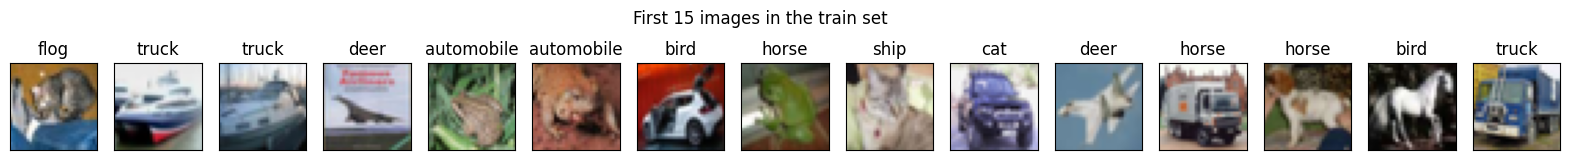

C:\Users\장동민\AppData\Local\Temp\ipykernel_27856\2384414265.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


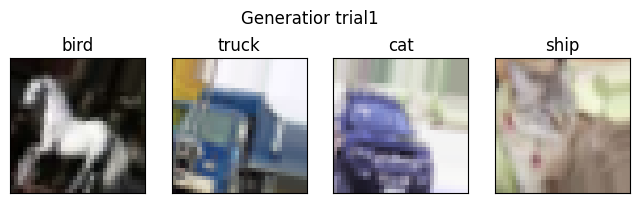

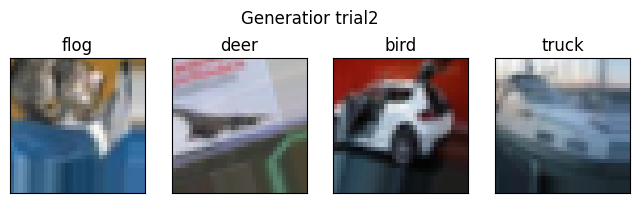

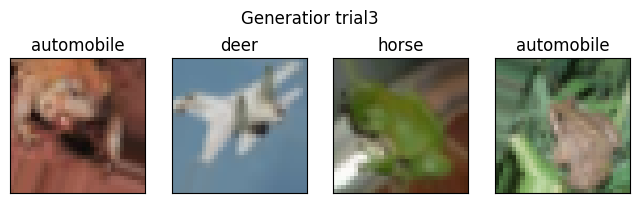

In [5]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train,y_train),(x_train,y_test)=ds.cifar10.load_data()
x_train=x_train.astype('float32');x_train/=255
x_train=x_train[0:15,]; y_train=y_train[0:15,]
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()

batch_siz=4
generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

for a in range(3):
    img,label=next(gen)
    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generatior trial"+str(a+1))
    for i in range(batch_siz):
        plt.subplot(1,batch_siz,i+1)
        plt.imshow(img[i])
        plt.xticks([]);plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

**ResNet50으로 자연 영상 인식하기**

In [2]:
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions

model=ResNet50(weights='imagenet')

img=cv.imread('rabbit.jpg')
x=np.reshape(cv.resize(img,(224,224)),(1,224,224,3))
x=preprocess_input(x)

preds=model.predict(x)
top5=decode_predictions(preds,top=5)[0]
print('result:',top5)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
result: [('n02325366', 'wood_rabbit', np.float32(0.7427542)), ('n02326432', 'hare', np.float32(0.24023652)), ('n02328150', 'Angora', np.float32(0.008815715)), ('n01877812', 'wallaby', np.float32(0.0026892489)), ('n02356798', 'fox_squirrel', np.float32(0.0012279304))]
